# Importing required packages

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

# Helper functions and constants to be used

In [2]:
# styles to use for mapping
plt.style.use("seaborn-whitegrid")
kwargs={"figsize":(20,10),"width":0.9,"fontsize":13}

# for adding commas between large floats e.g commaSeperate(100000)=>100,000
def commaSeperate(number):
    # return 0 if the number cannot be parsed as a float
    try:
        numberToFloat=float(number)
    except:
        return 0.0
    commaSeperatedNumber="{:,.2f}".format(numberToFloat)
    return commaSeperatedNumber

# function to get the meaning of a feature from the data description file
def getFeatureMeaning(featureName,pathtofile=f"./data_description.txt"):
    with open(pathtofile) as f:
        for row in f:
            if row.find(featureName)==0:
                print(row)

In [3]:
getFeatureMeaning("MSSubClass")

MSSubClass: Identifies the type of dwelling involved in the sale.	



# Read in in the dataset

In [4]:
dataset=pd.read_csv("dataset.csv").drop("Id",1) #drop the id column as it is redundant
print(f"There are {dataset.shape[1]} total columns and {dataset.shape[0]} rows in the dataset.\n") 
dataset.head()

There are 80 total columns and 1460 rows in the dataset.



,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Exploring the columns in the dataset

##### let us find out all the features/columns present in this dataset

In [5]:
# print out the initial number of features present

#Get all the columns in the dataset
columns=dataset.columns

#subtract one from the total length of the columns in order to account for the tagret variable which is salesPrice
print(f"All the columns in the dataset(length :{len(columns)-1}):\n")
print(*columns,sep=",\t")

All the columns in the dataset(length :79):

MSSubClass,	MSZoning,	LotFrontage,	LotArea,	Street,	Alley,	LotShape,	LandContour,	Utilities,	LotConfig,	LandSlope,	Neighborhood,	Condition1,	Condition2,	BldgType,	HouseStyle,	OverallQual,	OverallCond,	YearBuilt,	YearRemodAdd,	RoofStyle,	RoofMatl,	Exterior1st,	Exterior2nd,	MasVnrType,	MasVnrArea,	ExterQual,	ExterCond,	Foundation,	BsmtQual,	BsmtCond,	BsmtExposure,	BsmtFinType1,	BsmtFinSF1,	BsmtFinType2,	BsmtFinSF2,	BsmtUnfSF,	TotalBsmtSF,	Heating,	HeatingQC,	CentralAir,	Electrical,	1stFlrSF,	2ndFlrSF,	LowQualFinSF,	GrLivArea,	BsmtFullBath,	BsmtHalfBath,	FullBath,	HalfBath,	BedroomAbvGr,	KitchenAbvGr,	KitchenQual,	TotRmsAbvGrd,	Functional,	Fireplaces,	FireplaceQu,	GarageType,	GarageYrBlt,	GarageFinish,	GarageCars,	GarageArea,	GarageQual,	GarageCond,	PavedDrive,	WoodDeckSF,	OpenPorchSF,	EnclosedPorch,	3SsnPorch,	ScreenPorch,	PoolArea,	PoolQC,	Fence,	MiscFeature,	MiscVal,	MoSold,	YrSold,	SaleType,	SaleCondition,	SalePrice


#### These are all the features we are going to be working with, but since there are 79 in total, we have to drop some columns based on the degree of information we believe they contain, intuition and domain knowledge.

# Dropping of columns based on information they contain

### We have to drop some features, because some of them do not contain any informative features, and analysing afeature space of 81 would be very verbose, hencee we have to apply some statistical methods in order to whittle down the weak features.
### May the strong features survive the three trials!

### To measure this degree of information a column contains, we are going to measure this based on how many missing values they contain, with a personal bias that columns which are allowed to have lots of missing values are not deemed important. Important values are columns which would have few nor no missing values, hence we are going to drop columns which have lots of missing values, the cut-off value would be determined after observation of the dataset.

[]

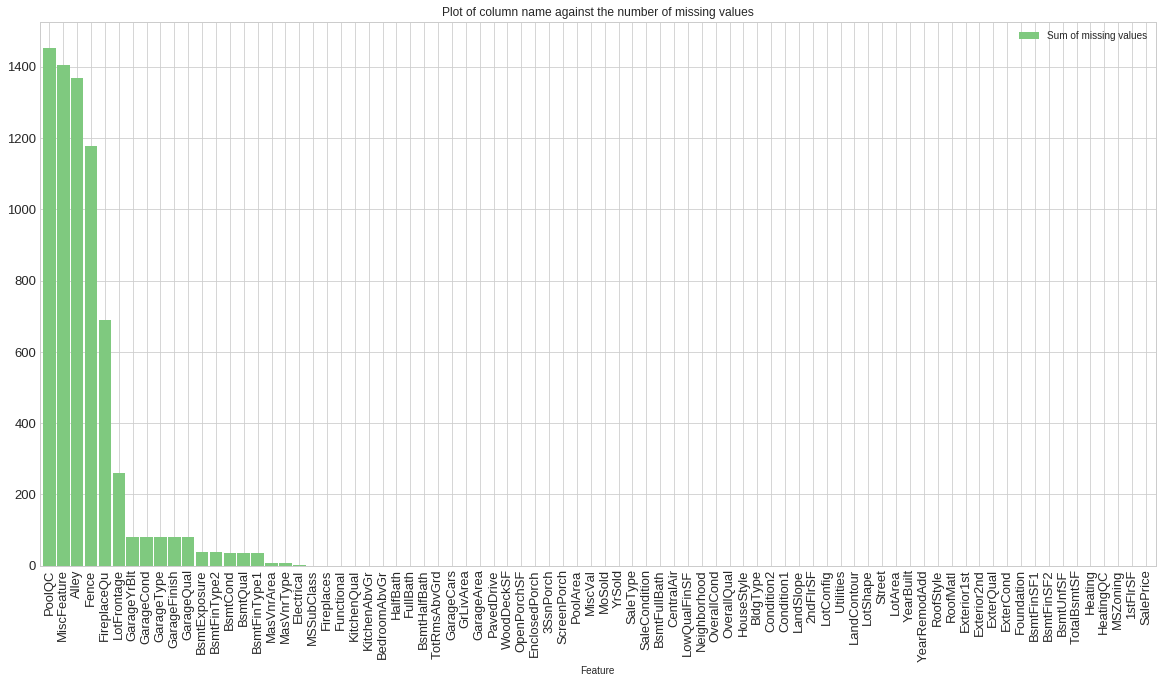

In [6]:
title="Plot of column name against the number of missing values"

# get the number of sum of missing values each column contains and map them to their coresponding columns
missing_values_count=map(lambda x: dataset[x].isnull().sum(),columns)

# zip together columns and their dtypes as well as their missing values count
columns_and_missing_values_count=list(zip(columns,missing_values_count))

# create a dataframe for these values and sort them in descending order of magnitude of missing values
columns_and_missing_values_count_df=pd.DataFrame(columns_and_missing_values_count,
                                                          columns=["Feature","Sum of missing values"])
# sort the dataframe based on the missing values they contain in descending order
columns_and_missing_values_count_df=columns_and_missing_values_count_df.sort_values("Sum of missing values",ascending=False)

columns_and_missing_values_count_df.plot(kind="bar",x="Feature",title=title,colormap="Accent",**kwargs)
plt.plot()

#### As we can see, some columns contain an exorbitant amount of missing values , while some-others contain as missing values as little as 1 or 8, relative to the dataset, i am going to drop columns which contain missing values greater than or equal to 37

In [7]:
cut_off_columns=37 #any column with missing values greater than 37 should be dropped

# get the column names of columns with missing values which are greater 37
condition=columns_and_missing_values_count_df['Sum of missing values'] >= cut_off_columns

# get the name of columns which satisfy the condition to be met, incluse salePrice because it is our target
columns_to_drop=columns_and_missing_values_count_df[condition]['Feature'].values.tolist()

print('The columns which are to be disqualified based on high missing value count are:\n')
print(*columns_to_drop,sep=",\t",end=".")

The columns which are to be disqualified based on high missing value count are:

PoolQC,	MiscFeature,	Alley,	Fence,	FireplaceQu,	LotFrontage,	GarageYrBlt,	GarageCond,	GarageType,	GarageFinish,	GarageQual,	BsmtExposure,	BsmtFinType2,	BsmtCond,	BsmtQual,	BsmtFinType1.

#### drop these uninformative features off the dataset

In [8]:
informative_dataset=dataset.drop(columns_to_drop,axis=1)

print(f"There are {informative_dataset.shape[1]} total columns and {informative_dataset.shape[0]} rows in the informative_dataset.") 
print(f"As we can see, we have just dropped {len(columns_to_drop)} uninformative columns.")

informative_dataset

There are 64 total columns and 1460 rows in the informative_dataset.
As we can see, we have just dropped 16 uninformative columns.


,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,112,0,0,0,0,4,2010,WD,Normal,142125


### Another measure for this degree of information a column contains: we are going to measure this based on the correlation of other columns with the target variable 'salesPrice', this will only hold effect over columns whose data-types are continous in nature

#### Plot the correlation of other datatypes against the salePrice feature

[]

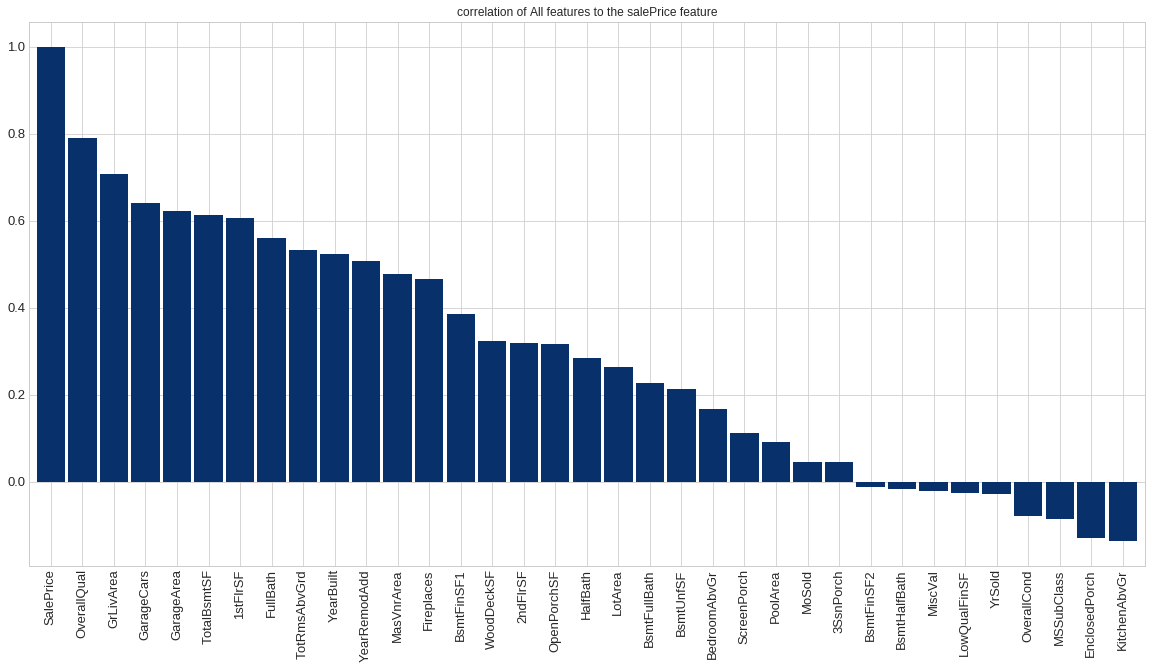

In [9]:
title="correlation of All features to the salePrice feature"

# derive the correlation matrix of the informative dataset
full_correlation_matrix=informative_dataset.corr()

# get the correlation of other features with respect to the target variable 'salePrice'
correlation_matrix=full_correlation_matrix['SalePrice'].sort_values(ascending=False)

# plot the correlation of each feature with sales price, in descending order
correlation_matrix.plot(kind="bar",title=title,colormap="Blues_r",**kwargs)
plt.plot()

#### From this graph I derive a cut off value of 0.4, any feature whose correlation with the target is less than 0.4 should be cut off, as it is not correlated enough annd could be noise in the data

In [10]:
cut_off_columns=0.2 #any column with a correlation less than 0.2 should be dropped

# get the column names of columns with correlation less than 0.4
condition=correlation_matrix <= cut_off_columns

# get the name of columns which satisfy the condition to be met
columns_to_drop=correlation_matrix[condition].index.tolist()

print('The columns which are to be disqualified based on Low correlation(<0.4) to target are:\n')
print(*columns_to_drop,sep=",\t",end=".")

The columns which are to be disqualified based on Low correlation(<0.4) to target are:

BedroomAbvGr,	ScreenPorch,	PoolArea,	MoSold,	3SsnPorch,	BsmtFinSF2,	BsmtHalfBath,	MiscVal,	LowQualFinSF,	YrSold,	OverallCond,	MSSubClass,	EnclosedPorch,	KitchenAbvGr.

#### Drop these columns from the dataset

In [11]:
informative_dataset=informative_dataset.drop(columns_to_drop,axis=1,errors='ignore')

print(f"There are {informative_dataset.shape[1]} total columns and {informative_dataset.shape[0]} rows in the informative_dataset.") 
print(f"As we can see, we have just dropped {len(columns_to_drop)} uninformative columns.")

informative_dataset

There are 50 total columns and 1460 rows in the informative_dataset.
As we can see, we have just dropped 14 uninformative columns.


,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice
0,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Typ,0,2,548,Y,0,61,WD,Normal,208500
1,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Typ,1,2,460,Y,298,0,WD,Normal,181500
2,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Typ,1,2,608,Y,0,42,WD,Normal,223500
3,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Typ,1,3,642,Y,0,35,WD,Abnorml,140000
4,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Typ,1,3,836,Y,192,84,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Typ,1,2,460,Y,0,40,WD,Normal,175000
1456,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Min1,2,2,500,Y,349,0,WD,Normal,210000
1457,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Typ,2,1,252,Y,0,60,WD,Normal,266500
1458,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Typ,0,1,240,Y,366,0,WD,Normal,142125


### After applying statistical methods to decide columns to drop, the next dropping tactic would be to drop uninformative features based on Range and standart deviation

#### Whaich columns are left?
#### Which columns withstood the trials of missing-values and the tribulations of  correlations ?

In [12]:
# get the columns which are left
columns_left=sorted(informative_dataset.columns.sort_values().tolist())

print(f'There are {len(columns_left)} colunms left.\n')
print(*columns_left,sep="    \t")

There are 50 colunms left.

1stFlrSF    	2ndFlrSF    	BldgType    	BsmtFinSF1    	BsmtFullBath    	BsmtUnfSF    	CentralAir    	Condition1    	Condition2    	Electrical    	ExterCond    	ExterQual    	Exterior1st    	Exterior2nd    	Fireplaces    	Foundation    	FullBath    	Functional    	GarageArea    	GarageCars    	GrLivArea    	HalfBath    	Heating    	HeatingQC    	HouseStyle    	KitchenQual    	LandContour    	LandSlope    	LotArea    	LotConfig    	LotShape    	MSZoning    	MasVnrArea    	MasVnrType    	Neighborhood    	OpenPorchSF    	OverallQual    	PavedDrive    	RoofMatl    	RoofStyle    	SaleCondition    	SalePrice    	SaleType    	Street    	TotRmsAbvGrd    	TotalBsmtSF    	Utilities    	WoodDeckSF    	YearBuilt    	YearRemodAdd


## In order to capture informative features we use a strategy explained hence:
#### We first group the entire dataset by that feature, then calculate the averagr salePrice for each group. the obeserve the range(max-min) and the standard devation of the salesPrice of each feature's category.
#### Informative features with respect to 'SalePrice' are features which would have a high range(i.e the difference between the highest and lowest value in the group is wide), because each category should have a linearly increasing large impact on the salePrice
#### Informative features should as well have a well above average deviation because the increasing impact of each feature should be felt on the price and make large strides in the price, so the average price of each category in the feature should very well differ from the average price of the next category in that feature
#### this idea can be shown as below to prove that informative features have high range and high standard deviation:

range: 388,438.39
std: 126,726.12


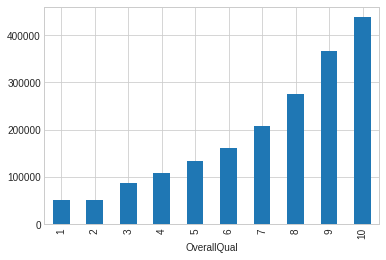

In [13]:
# informative feature
# we firstgroup the dataset by our currently most correlated continous feature 'OverallQual'
quality_group=dataset.groupby("OverallQual")["SalePrice"].mean().sort_values()
mean_price_per_group=quality_group.values
range_val=mean_price_per_group.max() - mean_price_per_group.min()
std=mean_price_per_group.std()

quality_group.plot(kind="bar")
plt.plot()
print("range:",commaSeperate(range_val))
print("std:",commaSeperate(std))

#### we can see that an informative feature has a wide range and a large standart deviation

range: 73,888.79
std: 27,523.80


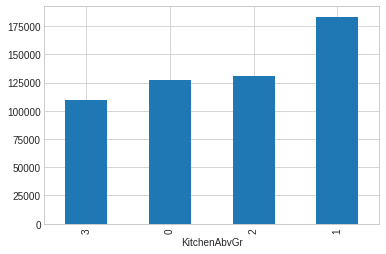

In [14]:
# non informative feature
# we firstgroup the dataset by our currently least correlated feature 'KitchenAbvGr'
quality_group=dataset.groupby("KitchenAbvGr")["SalePrice"].mean().sort_values()
mean_price_per_group=quality_group.values
range_val=mean_price_per_group.max() - mean_price_per_group.min()
std=mean_price_per_group.std()

quality_group.plot(kind="bar")
plt.plot()
print("range:",commaSeperate(range_val))
print("std:",commaSeperate(std))

#### on the contrary we can see that for features that are not highly correlated or informative it has a low range and an even lower standart devaition

### We apply this hypothesis to our remaining features in order to view their standard deviation and range

In [230]:
# a function that returns the feature name, standard deviation and range
def getRangeAndStd(column,target="SalePrice"):
    quality_group=dataset.groupby(column)[target].mean().sort_values()
    mean_price_per_group=quality_group.values
    range_val=mean_price_per_group.max() - mean_price_per_group.min()
    std=mean_price_per_group.std()
    
    return [column,range_val,std]

#### Get the range and standard deviation of all the columns remaining

The average standard deviation of sales price among all the remaining features is: 57,347.76
The average range of sales price among all the remaining features is: 275,759.89


[]

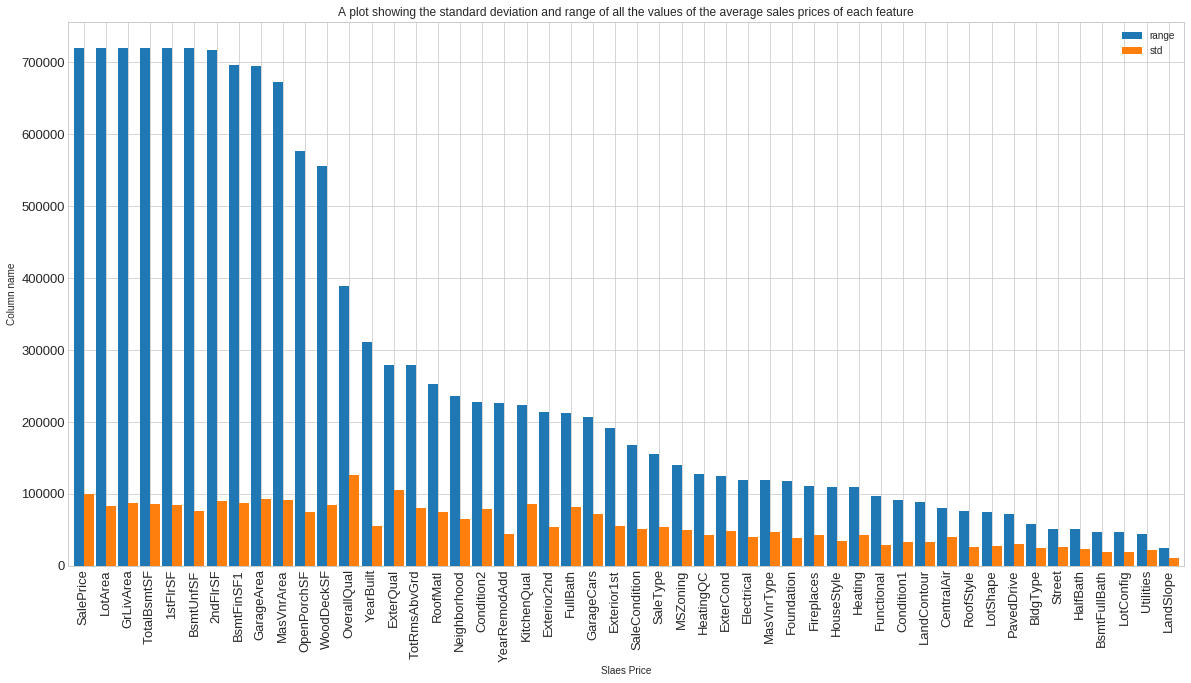

In [231]:
# obtain the range and standard deviation of each feature 
range_and_std=list(map(getRangeAndStd,columns_left))
range_and_std_df=pd.DataFrame(range_and_std,columns=["column name","range","std"]).sort_values(["range","std"],ascending=False)

# calculate the average range and standard deviation for the remaining features
avg_std=range_and_std_df["std"].mean()
avg_range=range_and_std_df["range"].mean()

print("The average standard deviation of sales price among all the remaining features is:",commaSeperate(avg_std))
print("The average range of sales price among all the remaining features is:",commaSeperate(avg_range))


# plot these values on a bar plot
range_and_std_df.plot(x="column name",kind="bar",**kwargs)
plt.xlabel("Slaes Price")
plt.ylabel("Column name")
plt.title("A plot showing the standard deviation and range of all the values of the average sales prices of each feature")
plt.plot()

#### Our 'informative features' would be those whose range and standard deviation are aboove the average values
#### Since range and devistion are correlated, i will pick only based on the range, because std wpuld become redundant

In [17]:
#get these columns
import math
# round off the average range to te nearest 100,000
round_avg_range=math.floor(avg_range/100000)*100000

# informative features are ones with a range greater that the average range
analysed_informative_features_rows=range_and_std_df[range_and_std_df["range"] > round_avg_range ]

# the columns gotten from our analysis
analysed_informative_features=analysed_informative_features_rows['column name'].tolist()

#### After careful observation of the dataset and some research, i found some columns which i think to be informative, because i would consider them if i were to get a house , although they did not  makee the cut

In [18]:
personal_column=["SaleCondition","SaleType","Electrical",'YrSold']

# create a list containng all of our informative features 
informative_features=analysed_informative_features+personal_column

#### Now that we have our informative features, we should get them and their meaning from the data description

### Here they are, they passed the trials of missing values, aced the tribulations of correlations ,braved the depths of deviations and the rocks of ranges. I present .... our champions, THE INFORMATIVE FEATURES

In [19]:
# display the informative columns and a brief description so i can understand what i am working with
print(f"{len(informative_features)} INFORMATIVE FEATURES AND THEIR MEANING:\n\n")
for col in informative_features:
    getFeatureMeaning(col)

28 INFORMATIVE FEATURES AND THEIR MEANING:


LotArea: Lot size in square feet

GrLivArea: Above grade (ground) living area square feet

TotalBsmtSF: Total square feet of basement area

1stFlrSF: First Floor square feet

BsmtUnfSF: Unfinished square feet of basement area

2ndFlrSF: Second floor square feet

BsmtFinSF1: Type 1 finished square feet

GarageArea: Size of garage in square feet

MasVnrArea: Masonry veneer area in square feet

OpenPorchSF: Open porch area in square feet

WoodDeckSF: Wood deck area in square feet

OverallQual: Rates the overall material and finish of the house

YearBuilt: Original construction date

ExterQual: Evaluates the quality of the material on the exterior 

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

RoofMatl: Roof material

Neighborhood: Physical locations within Ames city limits

Condition2: Proximity to various conditions (if more than one is present)

YearRemodAdd: Remodel date (same as construction date if no remodeling or a

# Exploratory data analysis
## The purpose of this analysis is to understand how the variables in the dataset relates to the sales Price

### Now tht we have our informative featuress, we now observe the relationships between variables, themselves and the target variables.
### Stay tuned, The fun has just began.

In [20]:
# create a dataframe containing only the informative features
informative_dataset=dataset[informative_features]

### Now, to explore the relationships between the dataset, we need to divide the features into categorical and continous features for ease in analysis. Before that  i need to check for missing values and develop a stretegy for filling them.

In [21]:
for feature_name in informative_dataset:
    print(f"{feature_name} of type {dataset[feature_name].dtype} with {dataset[feature_name].isnull().sum()} missing values.\n")

SalePrice of type int64 with 0 missing values.

LotArea of type int64 with 0 missing values.

GrLivArea of type int64 with 0 missing values.

TotalBsmtSF of type int64 with 0 missing values.

1stFlrSF of type int64 with 0 missing values.

BsmtUnfSF of type int64 with 0 missing values.

2ndFlrSF of type int64 with 0 missing values.

BsmtFinSF1 of type int64 with 0 missing values.

GarageArea of type int64 with 0 missing values.

MasVnrArea of type float64 with 8 missing values.

OpenPorchSF of type int64 with 0 missing values.

WoodDeckSF of type int64 with 0 missing values.

OverallQual of type int64 with 0 missing values.

YearBuilt of type int64 with 0 missing values.

ExterQual of type object with 0 missing values.

TotRmsAbvGrd of type int64 with 0 missing values.

RoofMatl of type object with 0 missing values.

Neighborhood of type object with 0 missing values.

Condition2 of type object with 0 missing values.

YearRemodAdd of type int64 with 0 missing values.

KitchenQual of type

#### we can see that Electrical has 1 missing value
#### we can also see that MasVnrArea has 8 missing values

#### in order to determine which strategy to fill them with, i first understand the description of the data

#### Since 'Electrical' feature deals with the  electrical system of the house, a proper strategy will be to fill it with the most common one, as most people by default are likely to install the most common electrical system

[]

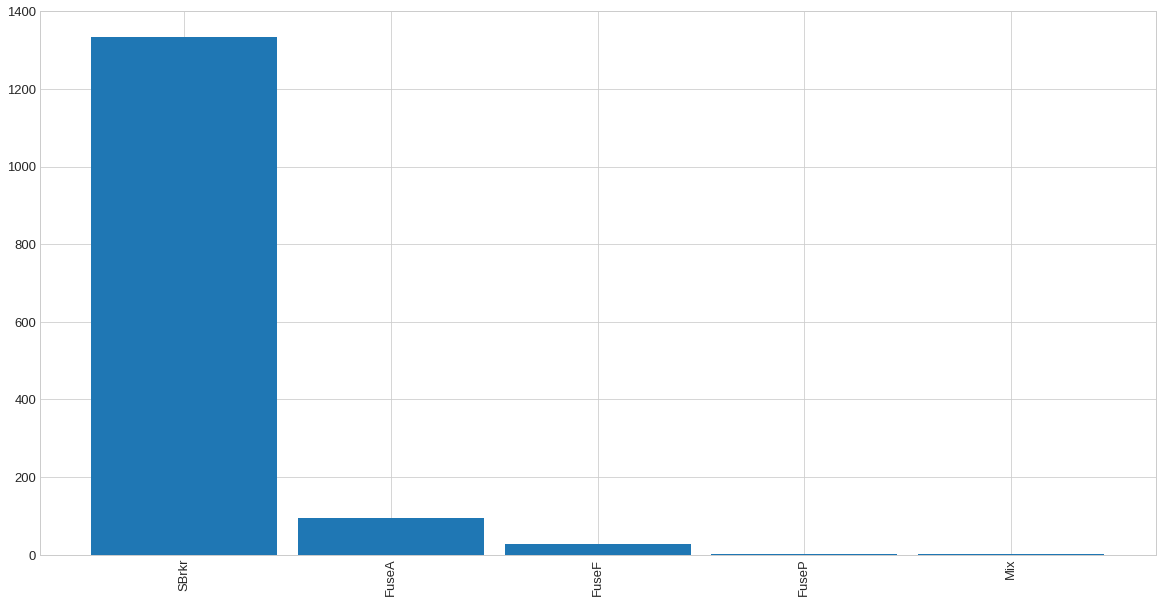

In [22]:
# get the most common, from electrical since it is a categorical column
informative_dataset['Electrical'].value_counts().plot(kind="bar",**kwargs)
plt.plot()

#### we can see that SBrkr is by far most common feature,  coincidentally it  stands for 'Standard Circuit Breakers & Romex' in the data description, we then replace all missing values in electrical feture by it.

In [23]:
# fill in the missing values of the electrical column
informative_dataset['Electrical']=informative_dataset['Electrical'].fillna('SBrkr')
print(f"The number of missing values in ELectrical column is {informative_dataset['Electrical'].isnull().sum()}")

The number of missing values in ELectrical column is 0


#### Since 'MasVnrArea' feature deals with the  area of the property, a measure to fill it would be the average value

In [24]:
average_area=informative_dataset['MasVnrArea'].mean()
informative_dataset['MasVnrArea']=informative_dataset['MasVnrArea'].fillna(average_area)
print(f"The number of missing values in ELectrical column is {informative_dataset['Electrical'].isnull().sum()}")

The number of missing values in ELectrical column is 0


### Split the column into categorical and continous

In [25]:
categorical=[
    "ExterQual","RoofMatl","Neighborhood","Condition2","KitchenQual","Exterior2nd","SaleCondition"
]

# continous featuers are ones which are in our informative variables but not in continous
continous=[
    feature for feature in informative_features if feature not in categorical
]

### Analyse the numerical dataset

#### firstly let us understand the distribution and dispersion of the target variable as well as the values it can take


[]

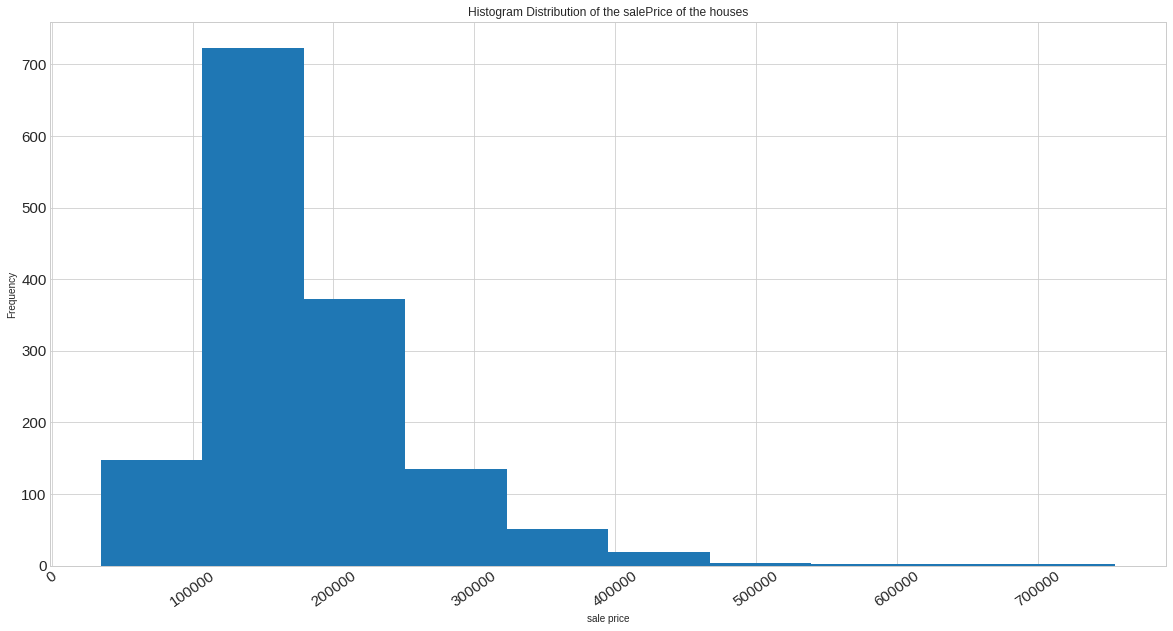

In [26]:
informative_dataset['SalePrice'].plot(kind="hist",figsize=(20,10),fontsize= 15,rot=35)
plt.title("Histogram Distribution of the salePrice of the houses")
plt.xlabel("sale price")
plt.plot()

#### From this visualisation we can see that the salePrice is slightly skewed to the left and more houses are more lower priced that they are higher.

In [27]:
# a brief lookup of the datadescription
!cat data_description.txt

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

#### Properly understanding all our numerical features

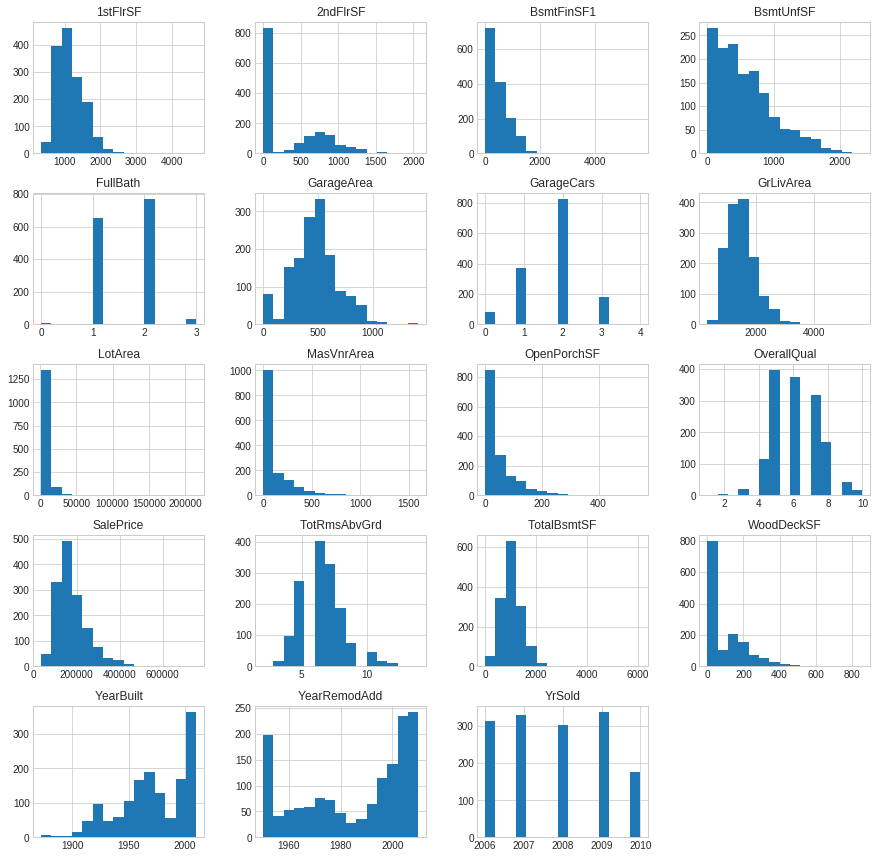

In [28]:
# plotting all our numerical variables in prder to note some points about them
informative_dataset[continous].hist(bins=15, figsize=(15,15), layout=(5, 4));

In [29]:
getFeatureMeaning('BsmtUnfSF')

BsmtUnfSF: Unfinished square feet of basement area



#### i was a little scared of the BsmtUnfSF feature which appeared to have most of its values towards it's head, but since it stands for unifinished square feet, the observation is actually a good thing

In [30]:
getFeatureMeaning("1stFlrSF")

1stFlrSF: First Floor square feet



#### we can also see that the houses reducecd drastically in 2010, i should investigate further into the cause of this

In [31]:
dataset[dataset['YrSold'] == 2010].groupby('MoSold')['YrSold'].count()

MoSold
1    10
2    15
3    21
4    39
5    48
6    36
7     6
Name: YrSold, dtype: int64

#### we can see that data was only collected up to july 2010, thus if we were to build a model under the assumption that there was a decrease in sales during 2010. that would be a very naive bayes(bias)!

### From this graph a few things can be observed  about the houses
#### Most houses have a first floor square feet of between one thousand to two thousand
#### Most houses do not have a second floor( I think having second floors moght actually have a strong impact on prices)
#### Most of our sold houses had an overall quality of 5 or higher
#### The lot area looks like it has a few outliers that might need to be removed before any modelling
#### Most houses were built more recently
#### The garage area follows a normal distribution which is a good thing as it means our garageArea is well balanced

### Analyse the categorical features

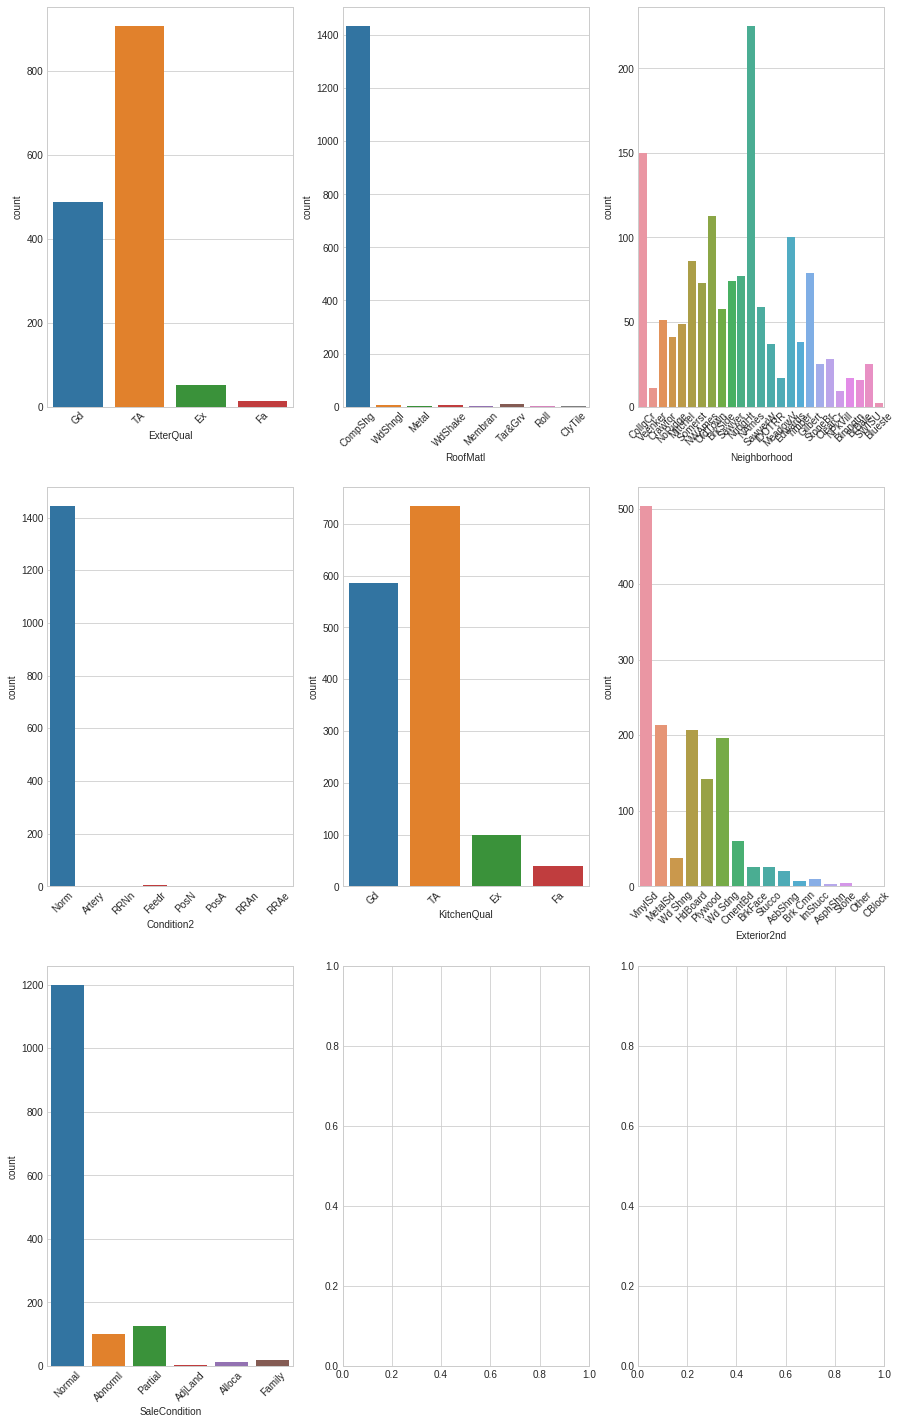

In [32]:
# use several plots to display our categorical columns

figure, axes = plt.subplots(3, 3,figsize=(15, 25))

for variable, subplot in zip(categorical, axes.flatten()):
    sns.countplot(informative_dataset[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(45)

### From the above graphs a few things can be observed  about the houses
#### Most houses have an external quality of TA (this means typical or average) as expected
#### Most houses reside in a particulan neighborhood ''NridgHt	Northridge Heights"

## Analyzing Relationships Between Numerical Variables and categorical variables, in order to determine the most closely related to salePrice

### categorical variables and sale price

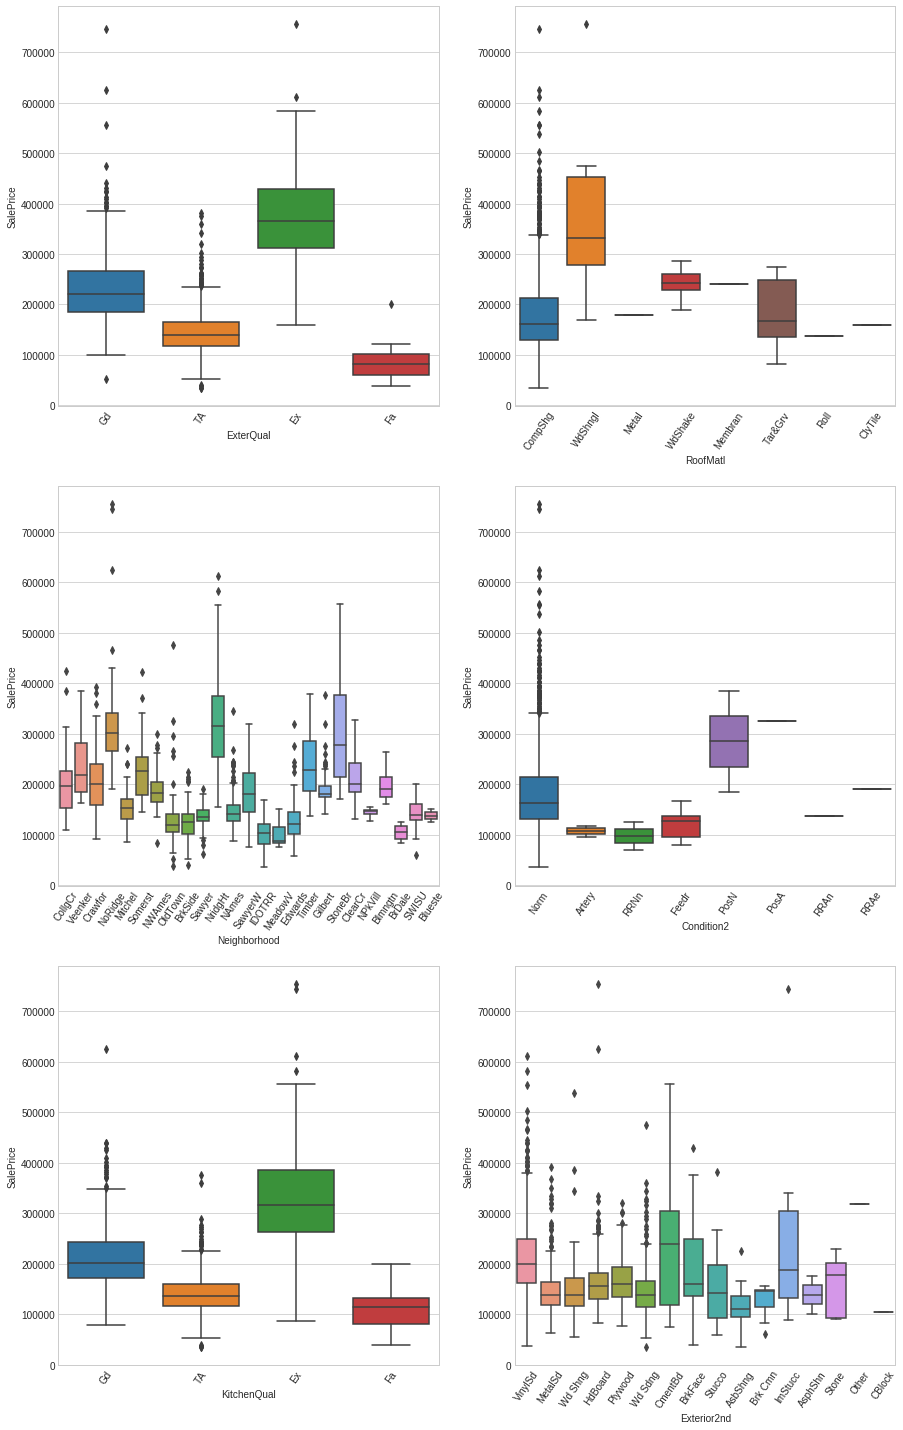

In [55]:
fig, ax = plt.subplots(3, 2, figsize=(15, 25))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y='SalePrice', data=dataset, ax=subplot)
    try:
        plt.setp(subplot.get_xticklabels(), rotation=55)
    except:
        pass


#### Here, we have iterated through every subplot to produce the visualization between all categorical variables and the SalePrice.

#### Using the Candle sticks, we can see that kitchenQual of "Ex" has a high dispersion as well as a far higher average value than the rest of the kind of kitchen features, meaning it has a far better sales price, that all other types, However most other features show less dispersion, meaning there is not a lot of action going on.

#### The neighborhood value has a very interesting distribution, let us focus more on it

[]

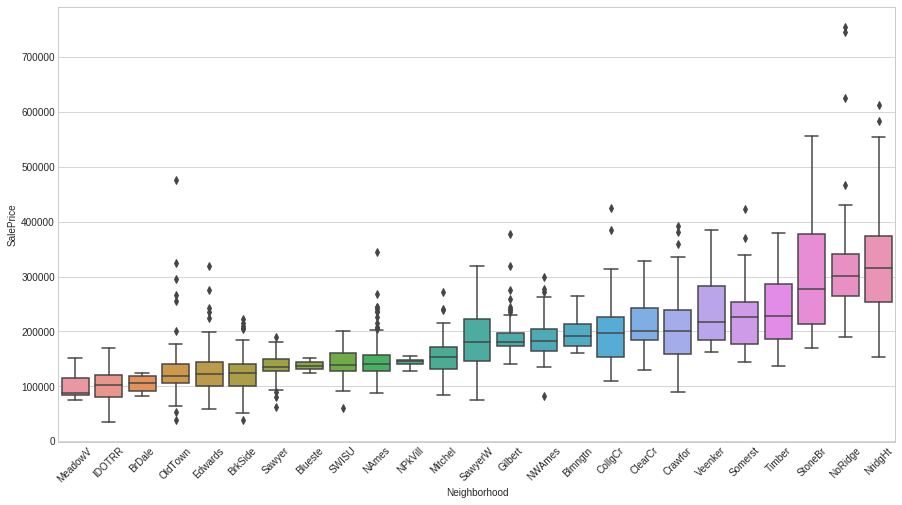

In [73]:
# group by neighborhood and sort by saleprice.
sorted_nb = informative_dataset.groupby(['Neighborhood'])['SalePrice'].median().sort_values()

#make the graph beautifull to look at
plt.figure(figsize=(15,8))
ax=sns.boxplot(x=informative_dataset['Neighborhood'], y=informative_dataset['SalePrice'], order=list(sorted_nb.index))
plt.setp(ax.get_xticklabels(), rotation=45)
plt.plot()

#### This figure gives us a lot of information. We can see that in the cheapest neighborhoods houses sell for a median price of around 100,000 dollars, and in the most expensive neighborhoods houses sell for around 300,000 dollars. We can also see that for some neighborhoods, dispersion between the prices is very low, meaning that all the prices are close to each other. In the most expensive neighborhood NridgHt, however, we see a large box — there is large dispersion in the distribution of prices

### continous variables and sale price

[]

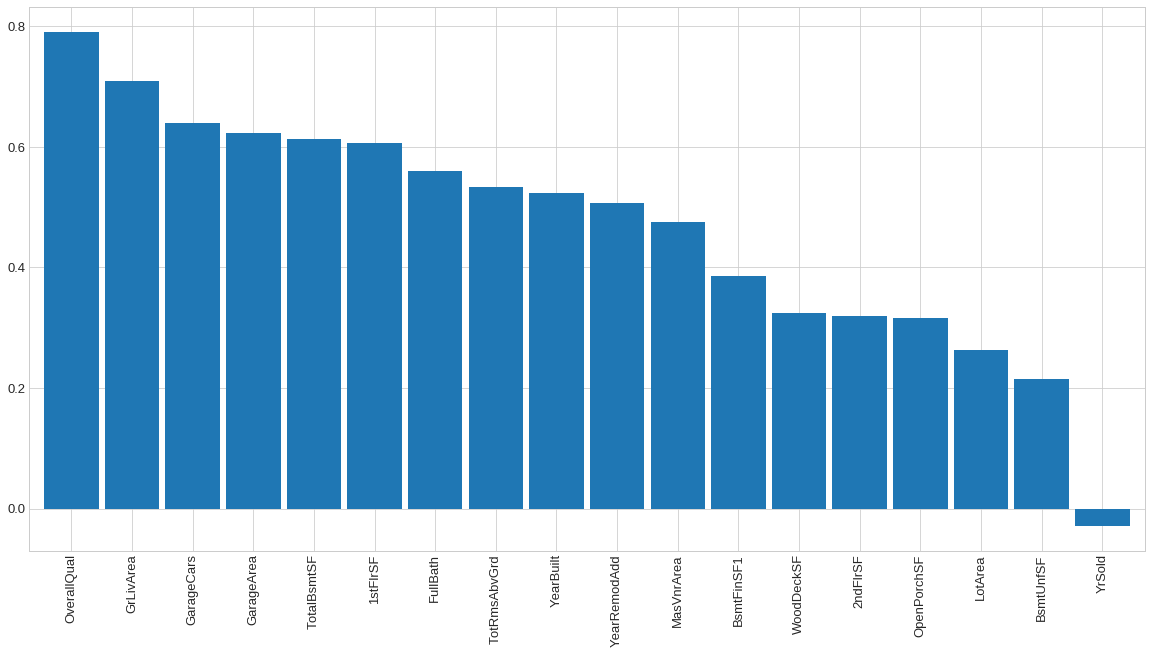

In [110]:
# plotting the correlation of numerical variables with sales price
# adding the [1:] indexer to exclude the sale's price from this bar plot, without it the sales price would be the most correlated feature
informative_dataset.corr()['SalePrice'].sort_values(ascending=False)[1:].plot(kind="bar",**kwargs)
plt.plot()

#### We can see that the best descriptive continous feature of the sale price is the overall quality

### Now that we have explored the relationship between variables and saleprice, we are going to cluster the dataset and pick the cluster with the highest mean price and explore the common features

In [ ]:
from sklearn.cluster import KMeans

In [312]:
# get the informative features values excluding the salePrice, so as not to get biased results when clustering
informative_features_df=informative_dataset

In [313]:
# use one hot encoding on the categorical variables to enable us feed them into the algorithm
informative_features_df_encoded=pd.get_dummies(informative_features_df)

#### scale the dataset and use PCA to reduce the dimension to visualise if we can easily divide it into clusters

In [314]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [315]:
pca=PCA(n_components=2)
scaled_input=StandardScaler().fit_transform(informative_features_df_encoded.values)
components=pca.fit_transform(scaled_input)

In [316]:
x_axis=components[:,0]
y_axis=components[:,1]

[]

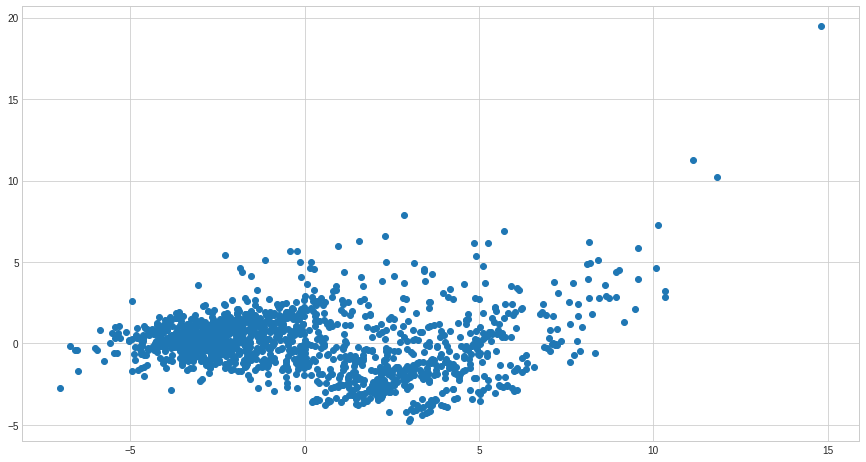

In [317]:
plt.figure(figsize=(15,8))
plt.scatter(x_axis,y_axis,)
plt.plot()

#### using the elbow method to determine the optimum cluster numbers to pick

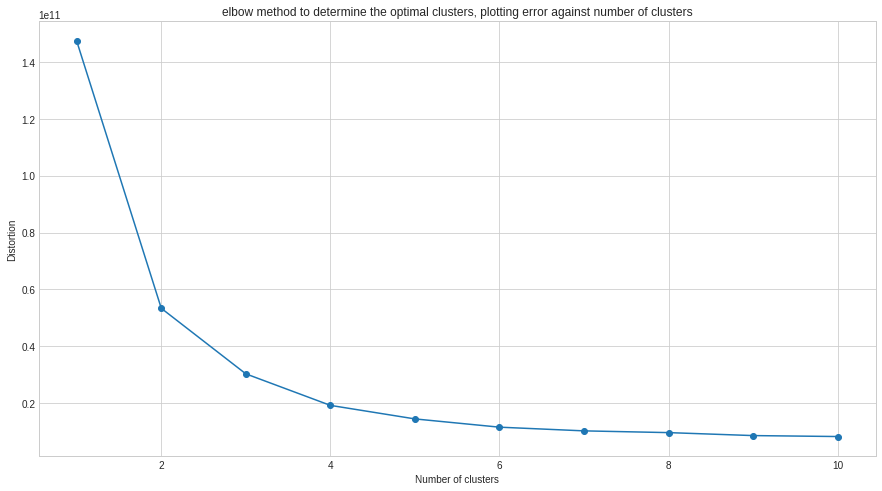

In [302]:
errors = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',random_state=0
    )
    km.fit(informative_features_df_encoded.values)
    errors.append(km.inertia_)

# plot
plt.figure(figsize=(15,8))
plt.plot(range(1, 11), errors, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title("elbow method to determine the optimal clusters, plotting error against number of clusters")
plt.show()

#### Based on the elbow method we can see thta the optimum cluster is 2

#### fit the kmeans model on the encoded dataset using the optimal number of clusters

In [319]:
n_optimum_clusters=2
kmeans=KMeans(n_clusters=n_optimum_clusters, init='random',random_state=0)
kmeans.fit(informative_features_df_encoded)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=2,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=0,
       tol=0.0001, verbose=0)

#### Predict the clusters each row belongs to

In [320]:
clusters=kmeans.predict(informative_features_df_encoded)

### check if our clusters do justice to the dataset

[]

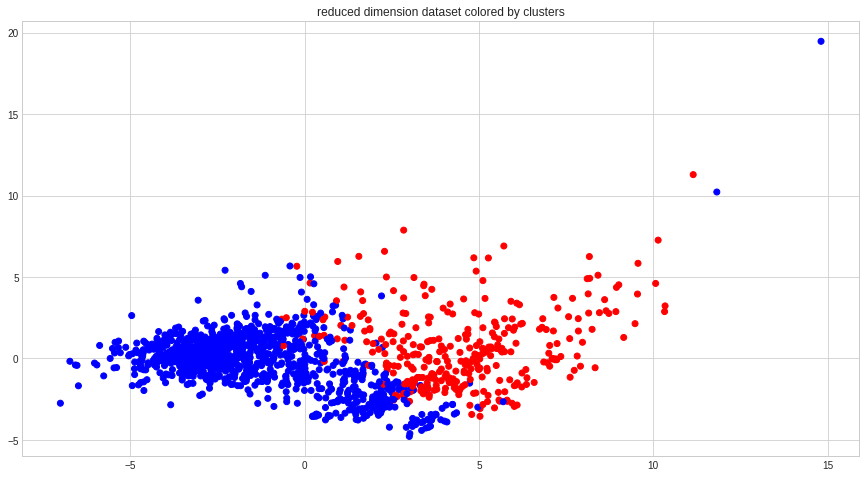

In [321]:
LABEL_COLOR_MAP={0:"red",1:"blue",2:"yellow",3:"black"}
label_color = [LABEL_COLOR_MAP[l] for l in clusters]
plt.figure(figsize=(15,8))
plt.scatter(x_axis, y_axis, c=label_color)
plt.title("reduced dimension dataset colored by clusters")
plt.plot()

#### we can see some outliers which we would have to remove before machine learning, but our dataset has fairly well seperated clusters, hopefully they seperate price well too

In [216]:
# view the size of each cluster
pd.value_counts(clusters)

1    1125
0     335
dtype: int64

In [217]:
# reattach each clusters, to it's original row
informative_dataset['clusters']=clusters

[]

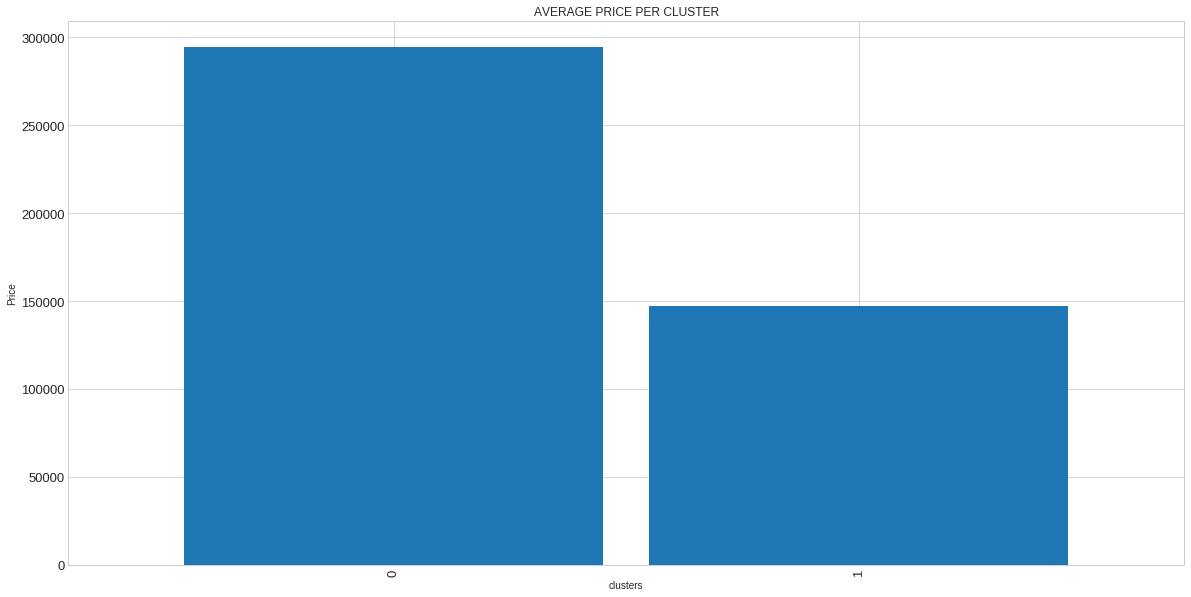

In [218]:
# let us see the average pice per cluster
plt.title("AVERAGE PRICE PER CLUSTER")
plt.ylabel("Price")
informative_dataset.groupby(['clusters'])['SalePrice'].mean().plot(kind="bar",**kwargs)
plt.plot()

### The final step is to group by each cluster and observe the feature with the highest variance and standard deviation per cluster, because this would mean that this is the feature that had the most effect in the seperation of these clusters which are originally seperated by price

In [271]:
#  a function to give us information about each cluster
# a function that returns the feature name, standard deviation and range
# upon any error, there is no deviation, or negative deviation
def getRangeAndStd(column):
    try:
        quality_group=informative_dataset.groupby(clusters)[column].mean().sort_values()
        mean_price_per_group=quality_group.values
        range_val=mean_price_per_group.max() - mean_price_per_group.min()
        std=mean_price_per_group.std()
    except:
        range_val=std=0

    
    return [column,range_val,std]

# informative_dataset.groupby(clusters)["TotRmsAbvGrd"].mean().sort_values().values.std()

The average standard deviation of sales price among all the remaining features is: 162.46
The average range of sales price among all the remaining features is: 324.92


[]

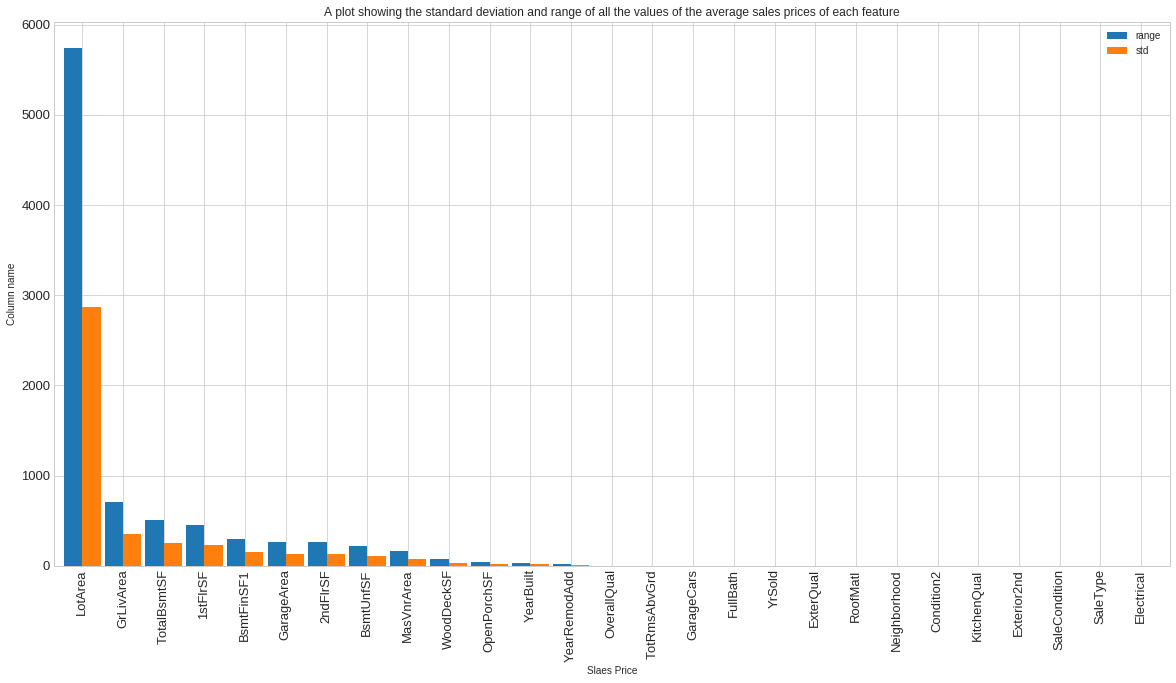

In [272]:
# obtain the range and standard deviation of each feature 
range_and_std=list(map(getRangeAndStd,final_features[1:]))
range_and_std_df=pd.DataFrame(range_and_std,columns=["column name","range","std"]).sort_values(["range","std"],ascending=False)

# calculate the average range and standard deviation for the remaining features
avg_std=range_and_std_df["std"].mean()
avg_range=range_and_std_df["range"].mean()

print("The average standard deviation of sales price among all the remaining features is:",commaSeperate(avg_std))
print("The average range of sales price among all the remaining features is:",commaSeperate(avg_range))


# plot these values on a bar plot
range_and_std_df.plot(x="column name",kind="bar",**kwargs)
plt.xlabel("Slaes Price")
plt.ylabel("Column name")
plt.title("A plot showing the standard deviation and range of all the values of the average sales prices of each feature")
plt.plot()

#### Lotarea has by far the highest variance amont all the features

## considering both our total feature analysis using variances, as well as our analysis using correlation to the target variable and now finally using clusters, we can see that the "LotArea" played a major role in all these seperation tactics and it ranked well in all tests.

# I recommend that LotArea has the best description to saleprice, because the larger the lot size the larger the house , and a large lot size implies large cars which would also mean large income to purchase such cars